In [ ]:
!pip install konlpy
!python -m pip install urllib3
!pip install pandas

In [ ]:
from konlpy.tag import Hannanum,Komoran, Okt, Kkma
import urllib.request
import pandas as pd
hannanum = Hannanum()
komoran = Komoran()
okt = Okt()
kkm = Kkma()

In [ ]:
#morphs, nouns, pos

han = hannanum.pos("나는 오늘 아침에 일어나서 학교에 갔다.")
print(han)

kom = komoran.pos("나는 오늘 아침에 일어나서 학교에 갔다.")
print(kom)

OKT = okt.pos("나는 오늘 아침에 일어나서 학교에 갔다.")
print(OKT)

KKM = kkm.pos("내가 오늘 아침에 일어나서 학교에 갔다.")
print(KKM)

[('나', 'N'), ('는', 'J'), ('오늘', 'N'), ('아침', 'N'), ('에', 'J'), ('일어나', 'P'), ('아', 'E'), ('학교', 'N'), ('에', 'J'), ('가', 'P'), ('아다', 'E'), ('.', 'S')]
[('나', 'NP'), ('는', 'JX'), ('오늘', 'NNG'), ('아침', 'NNG'), ('에', 'JKB'), ('일어나', 'VV'), ('아서', 'EC'), ('학교', 'NNG'), ('에', 'JKB'), ('가', 'VV'), ('았', 'EP'), ('다', 'EF'), ('.', 'SF')]
[('나', 'Noun'), ('는', 'Josa'), ('오늘', 'Noun'), ('아침', 'Noun'), ('에', 'Josa'), ('일어나서', 'Noun'), ('학교', 'Noun'), ('에', 'Josa'), ('갔다', 'Verb'), ('.', 'Punctuation')]
[('내가', 'NNG'), ('오늘', 'NNG'), ('아침', 'NNG'), ('에', 'JKM'), ('일어나', 'VV'), ('서', 'ECD'), ('학교', 'NNG'), ('에', 'JKM'), ('가', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
train = pd.read_table('/content/ratings_train.txt')
test_data = pd.read_table('/content/ratings_test.txt')

100%|██████████| 50000/50000 [35:02<00:00, 23.78it/s]


Text(0, 0.5, 'total seconds')

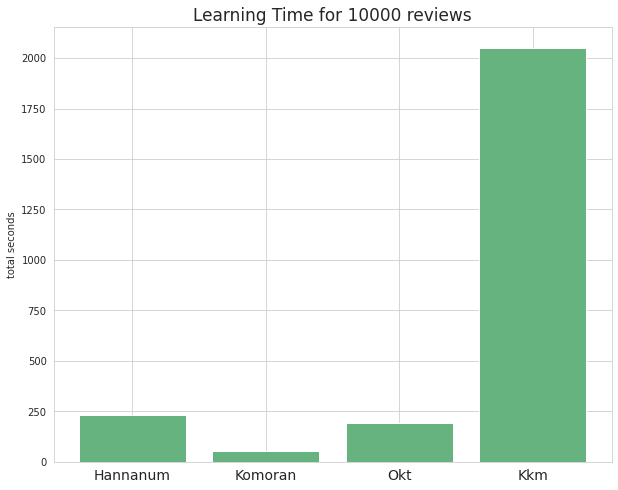

In [ ]:
import time
from tqdm import tqdm

def tagger_time(tagger, texts):
  time_sum = 0

  for sentence in tqdm(texts):
    t1 = time.time()
    try:
      tagger.morphs(sentence)
    except:
      pass
    t2 = time.time()

    time_sum += (t2 - t1)

  return time_sum
texts = train['document'][:50000]
time_list = []

for tagger in [hannanum, komoran, okt, kkm]:
  time_list.append(tagger_time(tagger, texts))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tagger = ['Hannanum', 'Komoran', 'Okt', 'Kkm']

plt.figure(figsize=(10,8))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('Learning Time for 10000 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')

In [ ]:
import requests
def get_translate(text):
    client_id = "Input your naverapi ID"
    client_secret = "Input your naverapi password" 

    data = {'text' : text,
            'source' : 'ko',
            'target': 'en'}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)


In [ ]:
trans = get_translate("나는 오늘 아침에 일어나서 학교에 갔다.")
trans

'I woke up this morning and went to school.'

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
token_text = word_tokenize(trans)
token_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'woke', 'up', 'this', 'morning', 'and', 'went', 'to', 'school', '.']

In [ ]:
print(nltk.pos_tag(token_text))

[('I', 'PRP'), ('woke', 'VBD'), ('up', 'RP'), ('this', 'DT'), ('morning', 'NN'), ('and', 'CC'), ('went', 'VBD'), ('to', 'TO'), ('school', 'NN'), ('.', '.')]
